In [14]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1oX5FmGjBkaOPQdzm7M2Kp3ScBzB7rQ-0' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)


ventura_msi_2017239_front.jpg


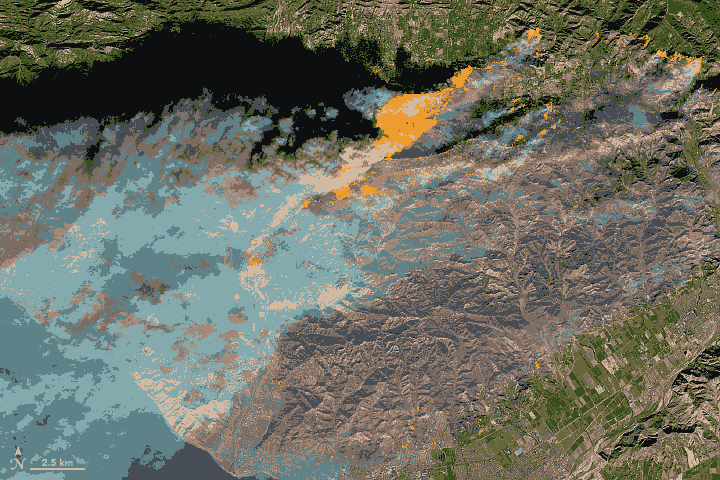

peru_vir_2016325_front.jpg


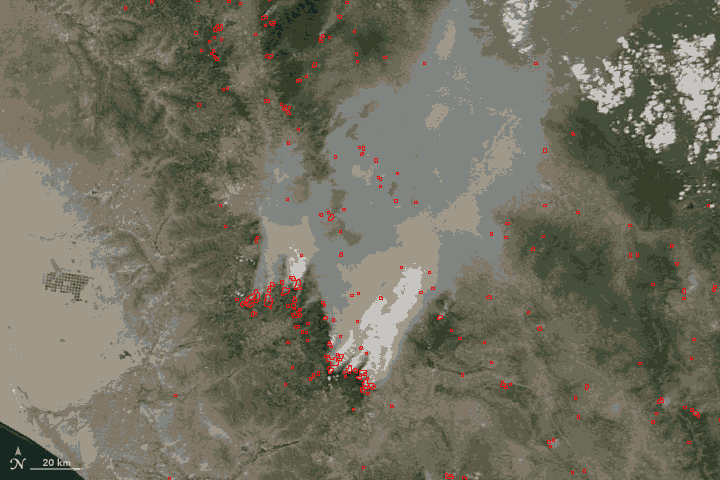

california_amo_2015217_front.jpg


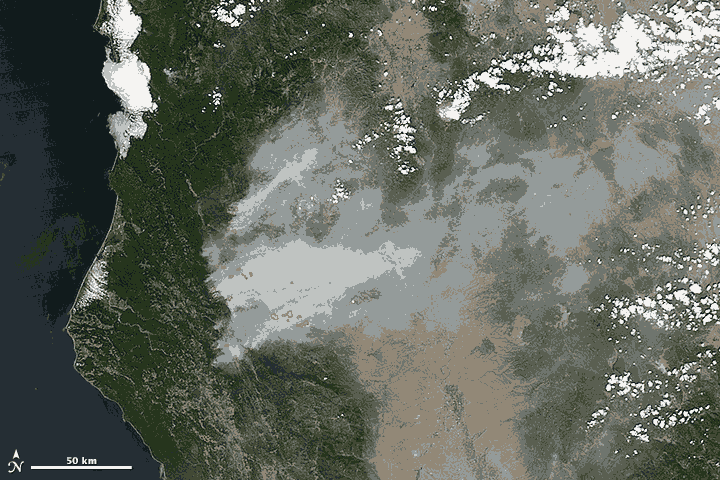

manitoba_amo_2018141_th.jpg


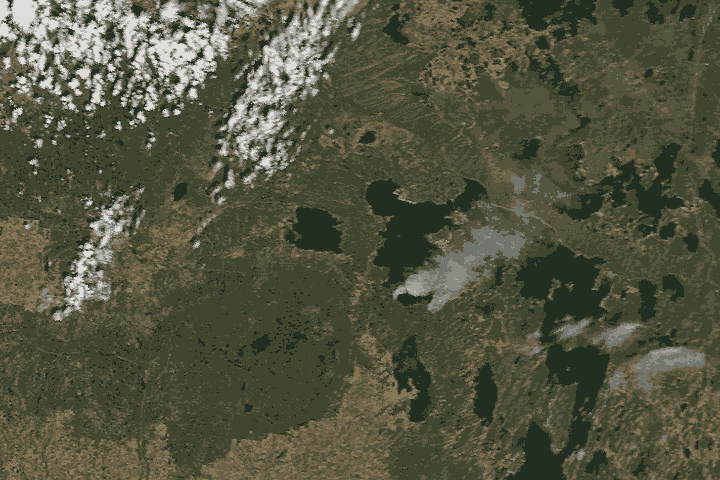

california_amo_2017189_front.jpg


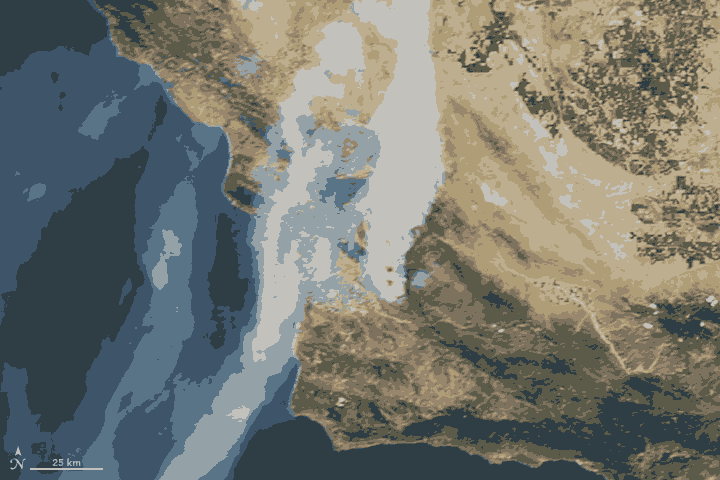

california_vir_2017348_tn.jpg


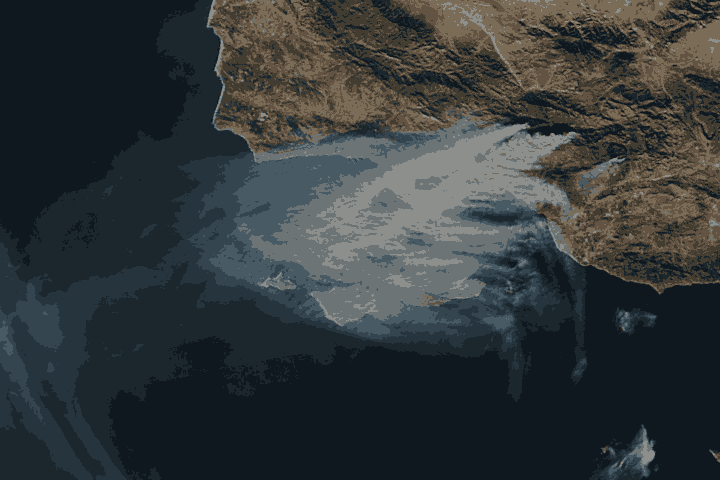

westernus_amo_2017178_tn.jpg


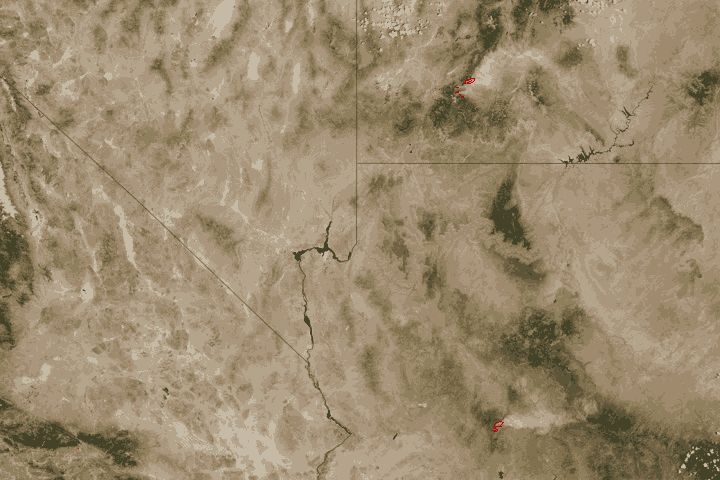

southeast_tmo_2016312_front.jpg


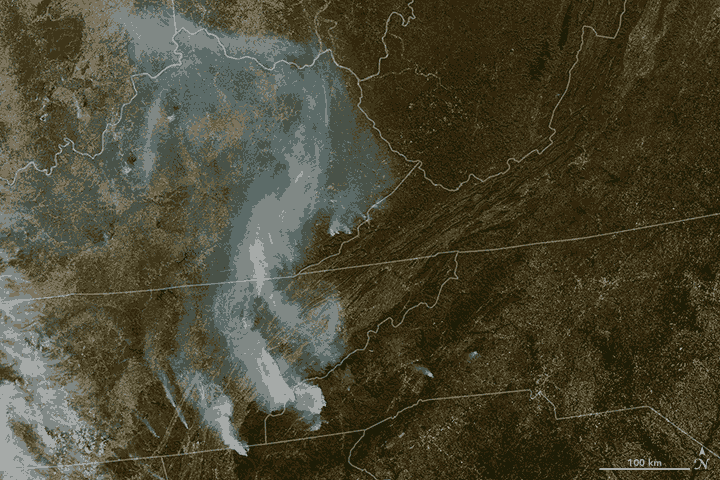

california_amo_2017282_front.jpg


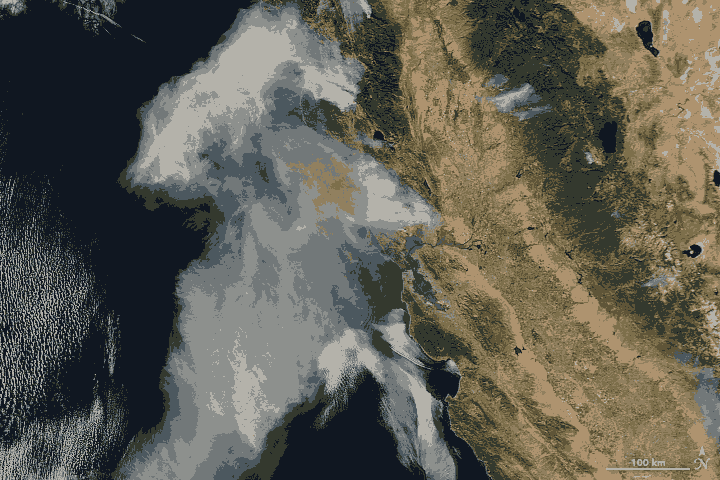

chile_amo_2017025_tn.jpg


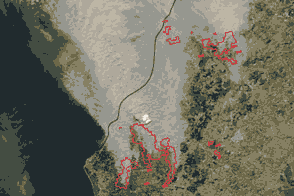

britishcolumbia_tmo_2017192_tn.jpg


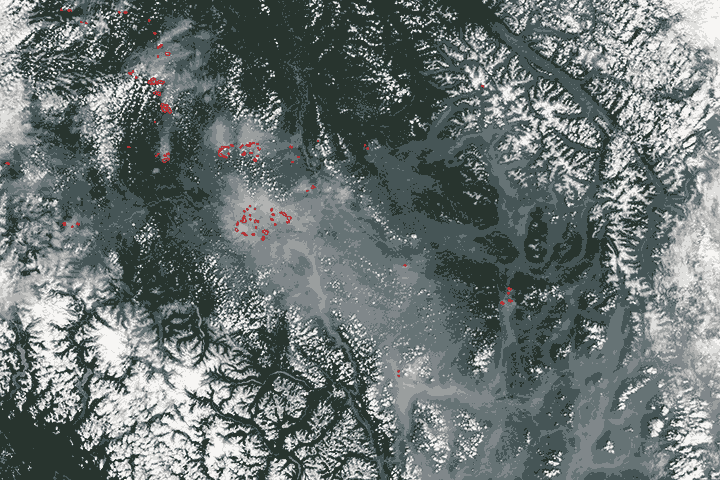

australia_tmo_2018022_tn.jpg


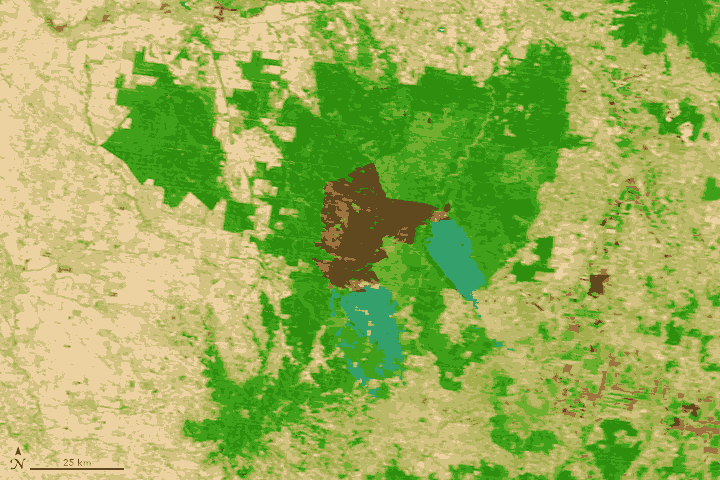

florida_amo_2018082_th.jpg


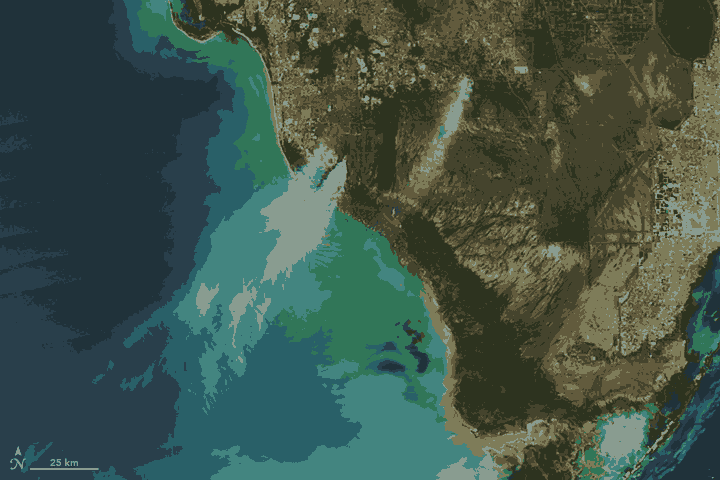

india_vir_2017298_tn.jpg


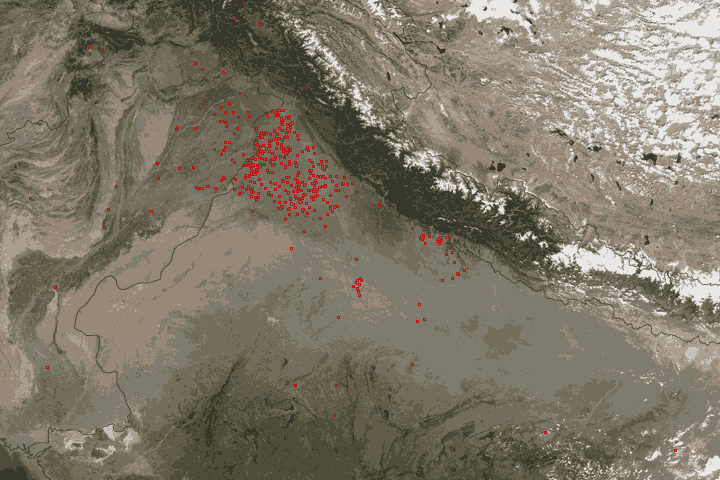

china_vir_2018094_front.jpg


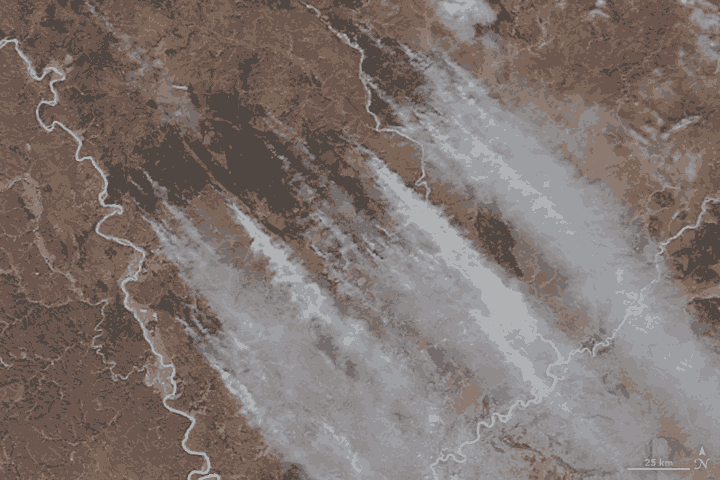

cocklebiddy_amo_2016342_front.jpg


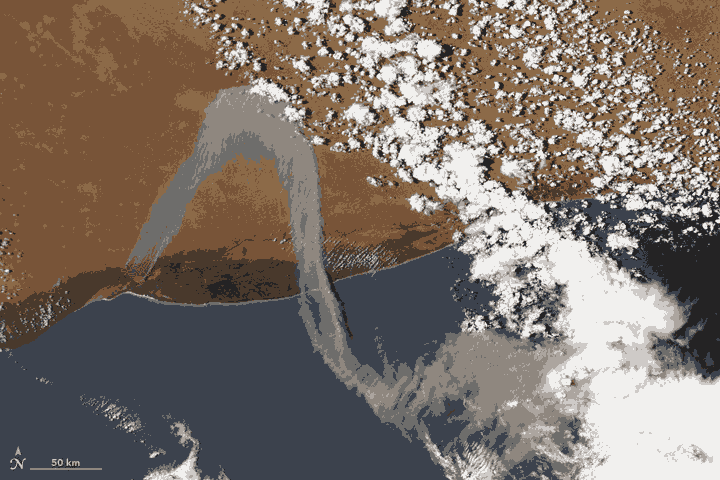

bcfires_tmo_2017199_front.jpg


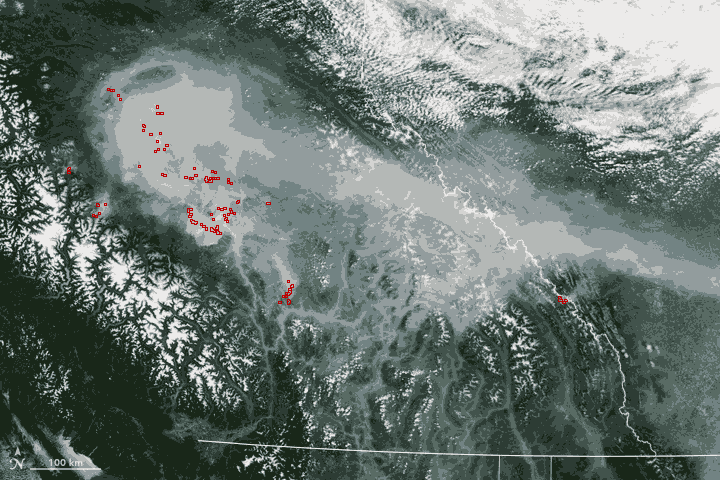

neaustralia_vir_2017166_tn.jpg


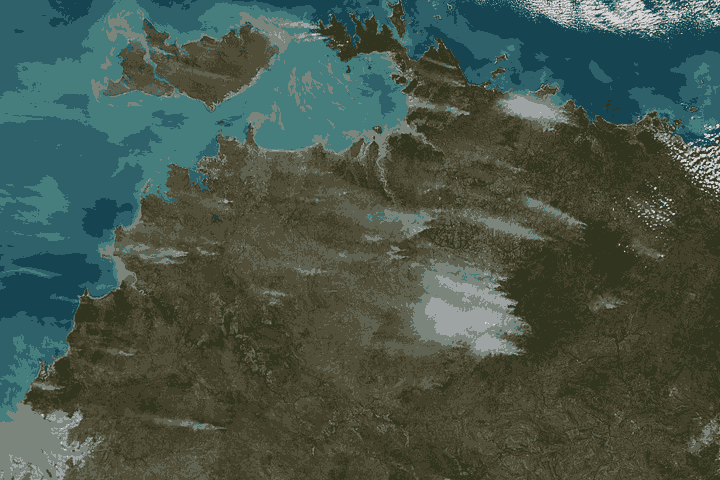

portugal_tmo_2017169_tn.jpg


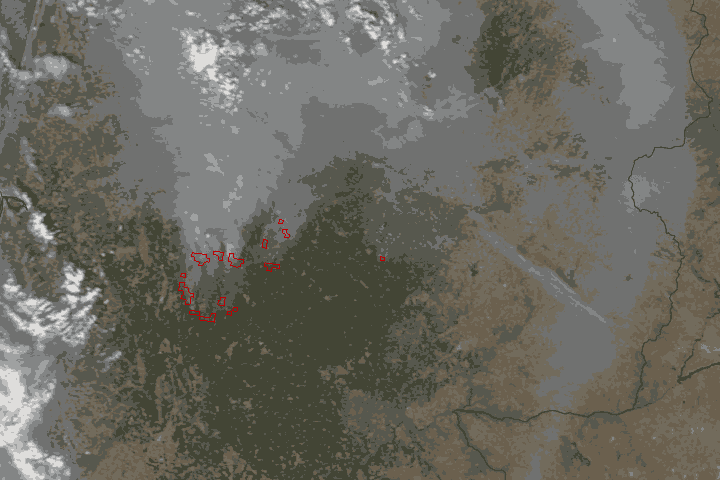

In [27]:
for filename in os.listdir(local_download_path):
    if filename.endswith("jpg"): 
        # Your code comes here such as 
        print(filename)
        img = cv2.imread(filename)
        Z = img.reshape((-1,3))
        Z = np.float32(Z)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        K = 10
        ret,label,center = cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
        center = np.uint8(center)
        res = center[label.flatten()]
        res2 = res.reshape((img.shape))
        cv2_imshow(res2)
        cv2.destroyAllWindows()

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('example2.jpg')
Z = img.reshape((-1,3))
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 5
ret,label,center = cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv2_imshow(res2)
cv2.destroyAllWindows()